#Milege Prediction using Machine Learning

##importing Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

##importing data

In [4]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

##Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


##Removing Missing Value

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


##Data Visualization

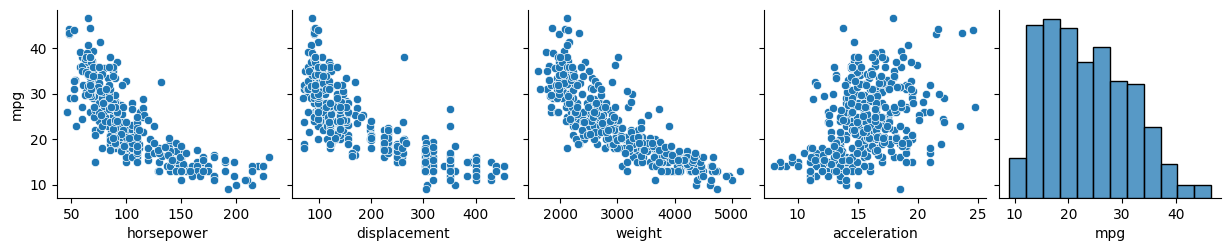

In [28]:
sns.pairplot(df,x_vars=['horsepower','displacement','weight','acceleration','mpg'],y_vars=['mpg']);

<Axes: xlabel='displacement', ylabel='mpg'>

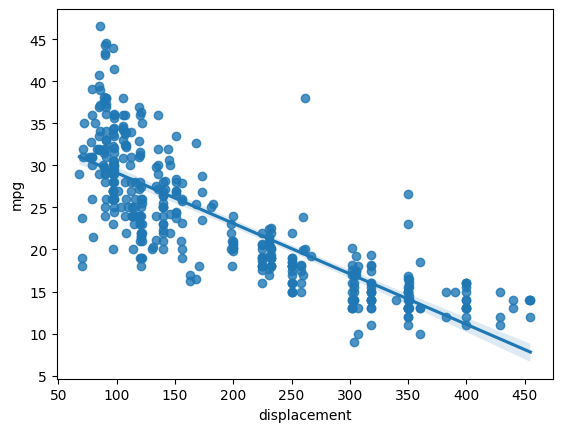

In [29]:
sns.regplot(x='displacement',y='mpg',data=df)

##Defining Target variable(y) and Features(x)

In [21]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [22]:
y =df['mpg']

In [23]:
y.shape

(392,)

In [31]:
X=df[['displacement','horsepower','acceleration','weight']]

In [32]:
X.shape

(392, 4)

In [33]:
X

,displacement,horsepower,acceleration,weight
0,307.0,130.0,12.0,3504
1,350.0,165.0,11.5,3693
2,318.0,150.0,11.0,3436
3,304.0,150.0,12.0,3433
4,302.0,140.0,10.5,3449
...,...,...,...,...
393,140.0,86.0,15.6,2790
394,97.0,52.0,24.6,2130
395,135.0,84.0,11.6,2295
396,120.0,79.0,18.6,2625


##Scaling Data

In [34]:
from sklearn.preprocessing import StandardScaler

In [45]:
ss=StandardScaler()

In [46]:
X = ss.fit_transform(X)

In [47]:
X

array([[ 1.07728956,  0.66413273, -1.285258  ,  0.62054034],
       [ 1.48873169,  1.57459447, -1.46672362,  0.84333403],
       [ 1.1825422 ,  1.18439658, -1.64818924,  0.54038176],
       ...,
       [-0.56847897, -0.53247413, -1.4304305 , -0.80463202],
       [-0.7120053 , -0.66254009,  1.11008813, -0.41562716],
       [-0.72157372, -0.58450051,  1.40043312, -0.30364091]])

In [49]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,4.350262e-16,-1.812609e-17
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-2.736983e+00,-1.608575e+00
25%,-8.555316e-01,-7.665929e-01,-6.410551e-01,-8.868535e-01
50%,-4.153842e-01,-2.853488e-01,-1.499869e-02,-2.052109e-01
75%,7.782764e-01,5.600800e-01,5.384714e-01,7.510927e-01
max,2.493416e+00,3.265452e+00,3.360262e+00,2.549061e+00


##Train Test Split Data

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [52]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

##Linear regression model

In [53]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
lr.intercept_

23.485738559737584

In [60]:
lr.coef_

array([-1.05767743, -1.68734727, -0.11495177, -4.10787617])

##Predicting Test Data

In [61]:
y_pred=lr.predict(X_test)

In [62]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

##Calculating Model accuracy

In [63]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_absolute_percentage_error

In [64]:
mean_absolute_error(y_test,y_pred)

3.3286968643244106

In [65]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [66]:
r2_score(y_test,y_pred)

0.7031250746717691

##Polynomial Regression

In [67]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [69]:
X_train2=poly.fit_transform(X_train)

In [70]:
X_test2=poly.fit_transform(X_test)

In [71]:
lr.fit(X_train2,y_train)

LinearRegression()

In [72]:
lr.intercept_

21.273364500637655

In [73]:
lr.coef_

array([-2.76070596, -5.00559628, -0.81225214, -1.36884133,  1.24596571,
       -0.90542822, -0.12475017, -0.17337823,  1.35064048,  1.41680398])

In [74]:
y_pred_poly=lr.predict(X_test2)

##Calculating Model Accuracy

In [75]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [76]:
mean_absolute_error(y_test,y_pred_poly)

2.7887147720295977

In [77]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12074018342938689

In [78]:
r2_score(y_test,y_pred_poly)

0.7461731314563802